# Predicting Podcast Time
**Author: Benson Wainaina**

In this notebook, I aim to predict the amount of time someone listens to a podcast. I'll be exploring various techniques such as linear regression, knearest neighbors, support vector machine, decision trees, random rainforest, neural networks, and ensemble methods. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
plt.style.use("bmh")

In [4]:
data_path = "../../../Data/playground-series-s5e4/"
train = pd.read_csv(data_path+"train.csv", index_col=["id"])
test = pd.read_csv(data_path+"test.csv", index_col=["id"])
sample_submission = pd.read_csv(data_path+"sample_submission.csv")

Now that I have the **data** I want to quickly explore it to understand what I'm working with.

In [6]:
train.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [7]:
test.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
id,,,,,,,,,,
750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [8]:
sample_submission.head()

,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 750000 non-null  object 
 1   Episode_Title                750000 non-null  object 
 2   Episode_Length_minutes       662907 non-null  float64
 3   Genre                        750000 non-null  object 
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Publication_Day              750000 non-null  object 
 6   Publication_Time             750000 non-null  object 
 7   Guest_Popularity_percentage  603970 non-null  float64
 8   Number_of_Ads                749999 non-null  float64
 9   Episode_Sentiment            750000 non-null  object 
 10  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), object(6)
memory usage: 68.7+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 750000 to 999999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 250000 non-null  object 
 1   Episode_Title                250000 non-null  object 
 2   Episode_Length_minutes       221264 non-null  float64
 3   Genre                        250000 non-null  object 
 4   Host_Popularity_percentage   250000 non-null  float64
 5   Publication_Day              250000 non-null  object 
 6   Publication_Time             250000 non-null  object 
 7   Guest_Popularity_percentage  201168 non-null  float64
 8   Number_of_Ads                250000 non-null  float64
 9   Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), object(6)
memory usage: 21.0+ MB


In [11]:
train.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,64.504738,59.859901,52.236449,1.348855,45.437406
std,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,1.300000,0.000000,0.000000,0.000000
25%,35.730000,39.410000,28.380000,0.000000,23.178350
50%,63.840000,60.050000,53.580000,1.000000,43.379460
75%,94.070000,79.530000,76.600000,2.000000,64.811580
max,325.240000,119.460000,119.910000,103.910000,119.970000


In [12]:
train.describe(include="O")

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
count,750000,750000,750000,750000,750000,750000
unique,48,100,10,7,4,3
top,Tech Talks,Episode 71,Sports,Sunday,Night,Neutral
freq,22847,10515,87606,115946,196849,251291


In [13]:
test.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
count,2.212640e+05,250000.000000,201168.000000,250000.000000
mean,4.192987e+02,59.716491,52.192796,1.355852
std,1.668545e+05,22.880028,28.445034,4.274399
min,2.470000e+00,2.490000,0.000000,0.000000
25%,3.578000e+01,39.250000,28.320000,0.000000
50%,6.397000e+01,59.900000,53.360000,1.000000
75%,9.415000e+01,79.390000,76.560000,2.000000
max,7.848626e+07,117.760000,116.820000,2063.000000


In [14]:
test.describe(include="O")

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
count,250000,250000,250000,250000,250000,250000
unique,48,100,10,7,4,3
top,Tech Talks,Episode 71,Sports,Sunday,Night,Neutral
freq,7553,3492,28903,38906,65440,83671


**Quick Observations:**
- There are podcasts that have episodes with zero length minutes.
- There seem to be outliers in the number of ads.
- Listening time has zero values.
- Episode length for train and test seem to differ by a huge margin.

## Exploratory Data Analysis

In [17]:
numeric_att = ["Episode_Length_minutes", "Host_Popularity_percentage", "Guest_Popularity_percentage", "Number_of_Ads"]
categorical_att = ["Podcast_Name", "Episode_Title", "Genre", "Publication_Day", "Publication_Time",	"Episode_Sentiment"]
target_att = ["Listening_Time_minutes"]

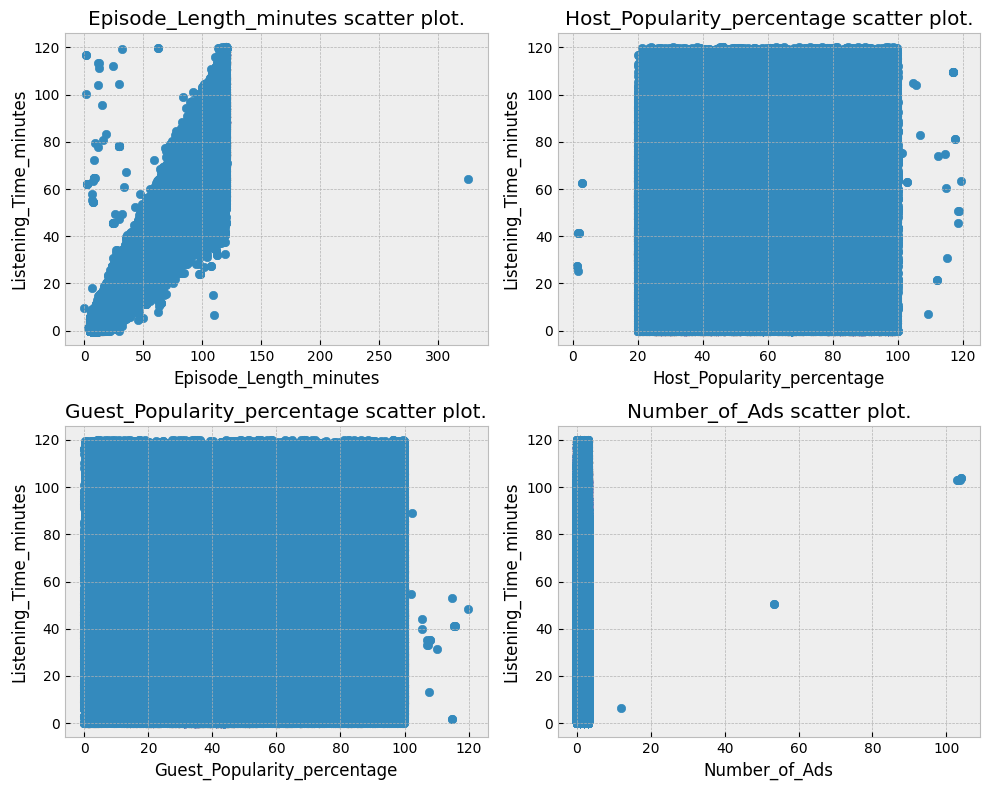

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
for i in range(4):
    
    ax[i//2, i%2].scatter(train[numeric_att[i]], train[target_att[0]])
    ax[i//2, i%2].set_title(f"{numeric_att[i]} scatter plot.")
    ax[i//2, i%2].set_xlabel(f"{numeric_att[i]}")
    ax[i//2, i%2].set_ylabel("Listening_Time_minutes")
    
fig.tight_layout()
plt.show()

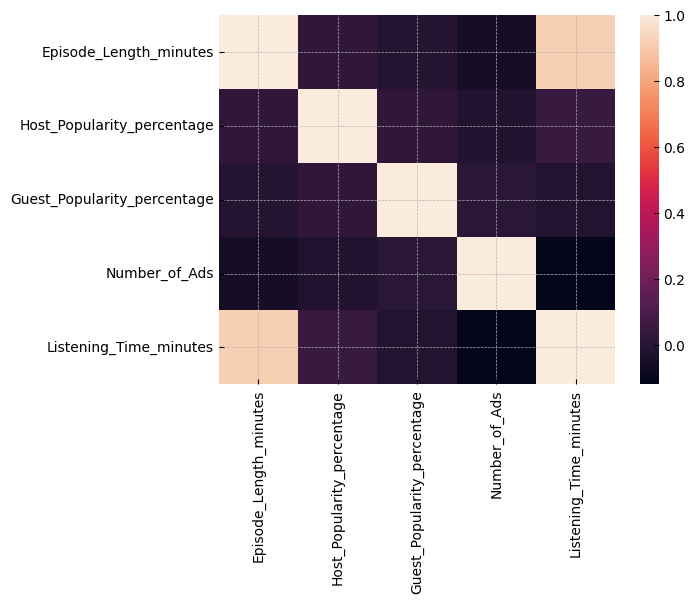

In [19]:
corr_matrix = train[numeric_att+target_att].corr()
fig, ax = plt.subplots()
sns.heatmap(corr_matrix, ax=ax)
plt.show()

In [20]:
corr_matrix["Episode_Length_minutes"].sort_values(ascending=False)

Episode_Length_minutes         1.000000
Listening_Time_minutes         0.916749
Host_Popularity_percentage     0.023596
Guest_Popularity_percentage   -0.009704
Number_of_Ads                 -0.054953
Name: Episode_Length_minutes, dtype: float64

In [21]:
zero_episode_length = train.loc[train["Episode_Length_minutes"]==0]
zero_episode_length

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
150178,Fashion Forward,Episode 16,0.0,Lifestyle,46.97,Friday,Afternoon,NaN,0.0,Negative,9.60684


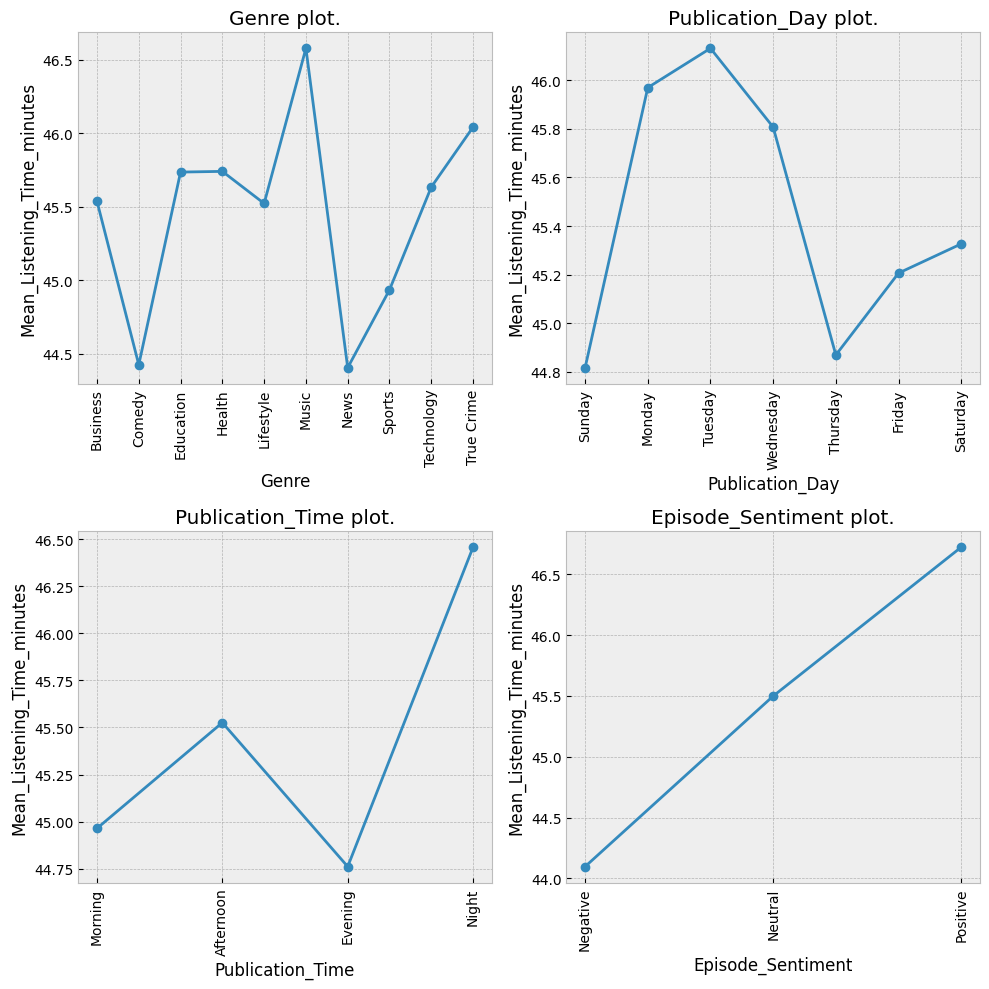

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i, att in enumerate(categorical_att[2:]):
    result = train.groupby(att)["Listening_Time_minutes"].mean()
    if att == "Publication_Day":
        result = result[["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]]
    elif att == "Publication_Time":
        result = result[["Morning", "Afternoon", "Evening", "Night"]]
    x, y = result.index, result.values
    ax[i//2, i%2].plot(x, y, marker="o")
    ax[i//2, i%2].set_title(f"{att} plot.")
    ax[i//2, i%2].set_xlabel(f"{att}")
    ax[i//2, i%2].set_ylabel("Mean_Listening_Time_minutes")
    ax[i//2, i%2].tick_params(axis="x", rotation=90)
    
fig.tight_layout()
plt.show()

In [23]:
no_guest = train.loc[train["Guest_Popularity_percentage"].isna()]
print(f"{(len(no_guest)/len(train))*100:.2f}% of the podcasts didn't have a \
guest and listening time was {no_guest['Listening_Time_minutes'].mean():.2f}")

19.47% of the podcasts didn't have a guest and listening time was 45.28


In [24]:
yes_guest = train.loc[~train["Guest_Popularity_percentage"].isna()]
print(f"{(len(yes_guest)/len(train))*100:.2f}% of the podcasts had a guest \
and listening time was {yes_guest['Listening_Time_minutes'].mean():.2f}")

80.53% of the podcasts had a guest and listening time was 45.48


In [25]:
no_episode_time = train.loc[train["Episode_Length_minutes"].isna()]
print(f"Null Length episodes had listening time of {no_episode_time['Listening_Time_minutes'].mean():.2f}")

Null Length episodes had listening time of 43.15


In [26]:
no_episode_time.describe(include="O")

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
count,87093,87093,87093,87093,87093,87093
unique,48,100,10,7,4,3
top,Tech Talks,Episode 31,Sports,Sunday,Evening,Positive
freq,2757,1329,10544,13152,23336,29765


In [27]:
yes_episode_time = train.loc[~train["Episode_Length_minutes"].isna()]
print(f"Episodes with length minutes have listening time of {yes_episode_time['Listening_Time_minutes'].mean():.2f}")

Episodes with length minutes have listening time of 45.74


In [28]:
print(f"{(len(no_episode_time)/len(train))*100:.2f}% of the podcasts didn't have episode length.")

11.61% of the podcasts didn't have episode length.


In [29]:
yes_episode_time.describe(include="O")

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
count,662907,662907,662907,662907,662907,662907
unique,48,100,10,7,4,3
top,Tech Talks,Episode 71,Sports,Sunday,Night,Neutral
freq,20090,9410,77062,102794,174311,222556


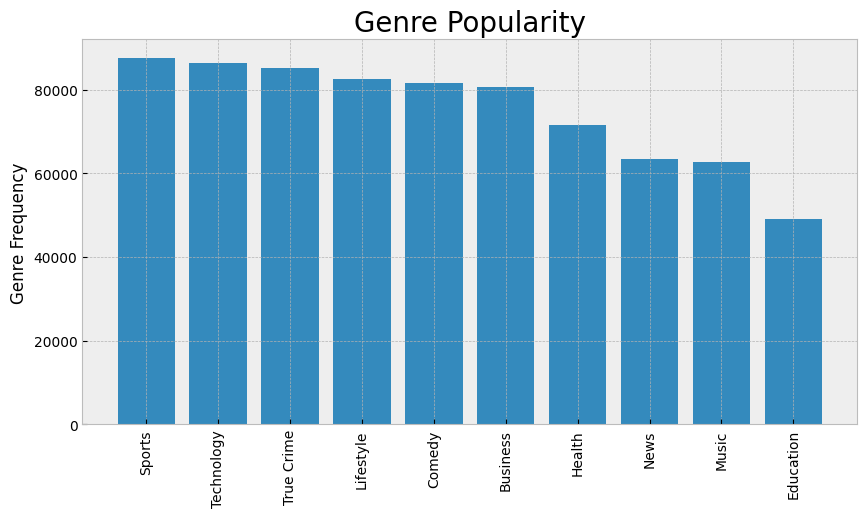

In [30]:
genre_popularity = train["Genre"].value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(genre_popularity.index, genre_popularity.values)
ax.tick_params(axis="x", rotation=90)
ax.set_title("Genre Popularity", size=20)
ax.set_ylabel("Genre Frequency")
plt.show()

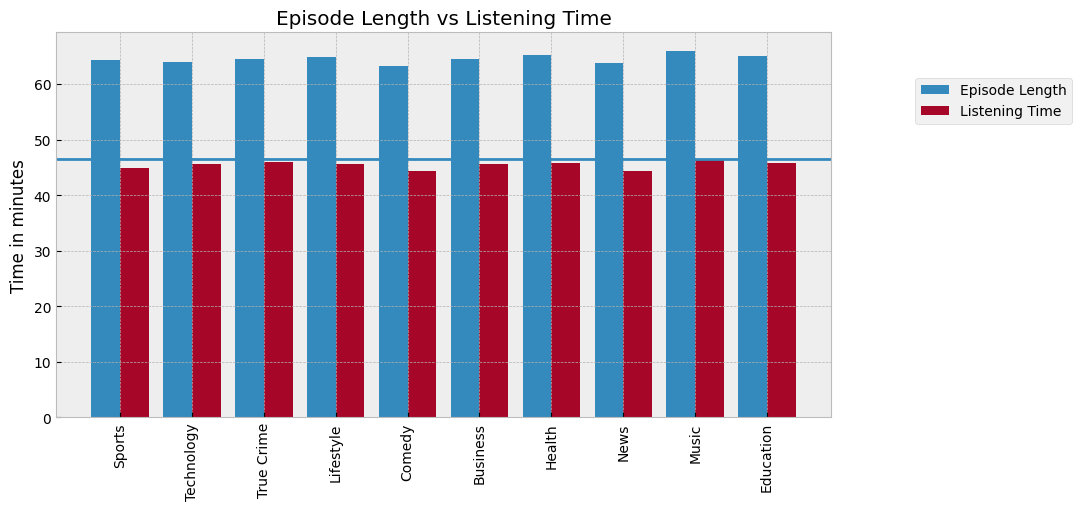

In [31]:
genre_episode_listening = train.groupby("Genre")[["Episode_Length_minutes", "Listening_Time_minutes"]].mean()
genre_episode_listening = genre_episode_listening.loc[["Sports", "Technology", "True Crime", "Lifestyle", 
                                                   "Comedy", "Business", "Health", "News", "Music", "Education"]]
fig, ax = plt.subplots(figsize=(10, 5))
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.bar(x-0.2, 
       genre_episode_listening["Episode_Length_minutes"].values, 
       label="Episode Length", 
       width=0.4)
ax.bar(x+0.2, 
       genre_episode_listening["Listening_Time_minutes"].values,
       label="Listening Time", 
       width=0.4)
ax.legend(loc="upper left", 
          bbox_to_anchor=(1.1, 0.9))
ax.set_title("Episode Length vs Listening Time")
ax.set_xticks(x, 
              genre_episode_listening.index)
ax.set_ylabel("Time in minutes")
ax.tick_params(axis="x", 
               rotation=90)
ax.axhline(y=46.578394)
plt.show()

In [32]:
play_df = train.loc[~train["Episode_Length_minutes"].isna() & 
                    train["Listening_Time_minutes"]!=0, :].copy()
play_df["Episode_Listening_Quotent"] = play_df["Episode_Length_minutes"]/play_df["Listening_Time_minutes"]
play_df.groupby("Genre")["Episode_Listening_Quotent"].mean()

Genre
Business      1.880838
Comedy        2.032533
Education     1.808082
Health        2.458967
Lifestyle     1.977414
Music         2.641042
News          1.900097
Sports        2.056520
Technology    1.725090
True Crime    2.096692
Name: Episode_Listening_Quotent, dtype: float64

*Was to use the correlation between Episode Length and Listening Time to fill the null values in Episode Length, however, since test data doesn't have Listening Time this idea is null and a void.*

In [34]:
play_df.groupby("Episode_Sentiment")["Guest_Popularity_percentage"].mean().sort_values(ascending=False)

Episode_Sentiment
Negative    52.510044
Positive    52.473022
Neutral     52.012668
Name: Guest_Popularity_percentage, dtype: float64

In [35]:
play_df.groupby("Episode_Sentiment")["Host_Popularity_percentage"].mean().sort_values(ascending=False)

Episode_Sentiment
Positive    60.065093
Neutral     59.876444
Negative    59.599684
Name: Host_Popularity_percentage, dtype: float64

In [36]:
play_df.loc[~play_df["Guest_Popularity_percentage"].isna(), "Episode_Sentiment"].value_counts(ascending=False)

Episode_Sentiment
Neutral     179587
Negative    177409
Positive    177086
Name: count, dtype: int64

In [37]:
play_df.loc[play_df["Guest_Popularity_percentage"].isna(), "Episode_Sentiment"].value_counts(ascending=False)

Episode_Sentiment
Neutral     41293
Positive    40225
Negative    39466
Name: count, dtype: int64

In [38]:
play_df["Episode_Title"] = play_df["Episode_Title"].apply(lambda x: int(x.split()[1]))
play_df.loc[~play_df["Episode_Length_minutes"].isna(), ["Episode_Title", "Episode_Length_minutes"]].corr()

,Episode_Title,Episode_Length_minutes
Episode_Title,1.000000,-0.020812
Episode_Length_minutes,-0.020812,1.000000


**Observations:**
- Episode length and listening time have a strong positive correlation.
- Instance with zero episode length seems to  be incorrect since listening time is 9 minutes.
- Early days of the week seem to have higher podcast listening times.
- Having a guest slightly improved listening time.
- Some podcasts didn't have episode length for some reason. These podcasts have different listening time compared to podcasts that had listening time.
- Genre popularity doesn't affect listening time.
- Episode sentiment does affect listening time.
- There seem to be a mismatch between genre and podcast name for some instances. 
- Host popularity is linked to episode sentiment but guest popularity doesn't follow this trend.
- Looks like a guest is invited to a podcast based on episode sentiment. Negative sentiment podcasts tend to attract guests.

## Model Building

I'll be creating a lot of models as earlier mentioned. To start off, I'll build a linear regression model. While building this model I want to understand how feature selection, feature engineering, and regularization affects predictions from this model.

### Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib

#### Data Processing

Here, I prepare the data to ensure it's appropriate for model building as follows:
- Filling null values.
- Converting categorical variables to numeric.
- Scaling the data.

In [46]:
# I assume that null values mean that there was no guest for that particular podcast
train["Guest_Popularity_percentage"] = train["Guest_Popularity_percentage"].fillna(-1)
test["Guest_Popularity_percentage"] = test["Guest_Popularity_percentage"].fillna(-1)

In [47]:
# Fill the one null with the most frequent number of ads.
train["Number_of_Ads"] = train["Number_of_Ads"].fillna(0)

In [48]:
# Here, I calculate the mean of Episode Length based on publication time and day
# Thereafter, I use this mean to fill the null values of Episode Length
publication_time_day = train.groupby(["Publication_Time", "Publication_Day"])["Episode_Length_minutes"].mean()
train["Episode_Length_minutes"] = train[["Publication_Time", "Publication_Day","Episode_Length_minutes"]].apply(lambda x: 
                                                                              publication_time_day[x["Publication_Time"], 
                                                                                                   x["Publication_Day"]] 
                                                                              if pd.isnull(x["Episode_Length_minutes"]) 
                                                                              else x["Episode_Length_minutes"], axis=1)

publication_time_day_test = train.groupby(["Publication_Time", "Publication_Day"])["Episode_Length_minutes"].mean()
test["Episode_Length_minutes"] = test[["Publication_Time", "Publication_Day","Episode_Length_minutes"]].apply(lambda x: 
                                                                              publication_time_day_test[x["Publication_Time"], 
                                                                                                        x["Publication_Day"]] 
                                                                              if pd.isnull(x["Episode_Length_minutes"]) 
                                                                              else x["Episode_Length_minutes"], axis=1)

In [49]:
train["Episode_Title"] = train["Episode_Title"].apply(lambda x: int(x.split()[1]))
test["Episode_Title"] = test["Episode_Title"].apply(lambda x: int(x.split()[1]))

In [50]:
one_hot_att = ["Podcast_Name", "Genre"]

In [51]:
one_hot_encoder = OneHotEncoder()
one_hot_features = one_hot_encoder.fit_transform(train[one_hot_att])
one_hot_features_test = one_hot_encoder.transform(test[one_hot_att])

In [52]:
one_hot_df = pd.DataFrame(one_hot_features.toarray(), 
                          columns=one_hot_encoder.get_feature_names_out())
one_hot_df_test = pd.DataFrame(one_hot_features_test.toarray(), 
                               columns=one_hot_encoder.get_feature_names_out())

In [53]:
train.drop(one_hot_att, axis= 1, inplace=True)
test.drop(one_hot_att, axis= 1, inplace=True)

In [54]:
# To help during concatination
test = test.reset_index(drop=True)

In [55]:
train = pd.concat([train, one_hot_df], axis=1)
test = pd.concat([test, one_hot_df_test], axis=1)

In [56]:
# Creating this dict to help perform manual ordinal encoding
days_dict = {"Monday": 0, "Tuesday": 1, "Wednesday": 2, 
             "Thursday": 3, "Friday": 4, "Saturday": 5, 
             "Sunday": 6}
time_dict = {"Morning": 0, "Afternoon": 1, 
             "Evening": 2, "Night": 3}
sentiment_dict = {"Negative": -1, "Neutral": 0, "Positive": 1}

In [57]:
train["Publication_Day"] = train["Publication_Day"].apply(lambda x: days_dict[x])
train["Publication_Time"] = train["Publication_Time"].apply(lambda x: time_dict[x])
train["Episode_Sentiment"] = train["Episode_Sentiment"].apply(lambda x: sentiment_dict[x])

test["Publication_Day"] = test["Publication_Day"].apply(lambda x: days_dict[x])
test["Publication_Time"] = test["Publication_Time"].apply(lambda x: time_dict[x])
test["Episode_Sentiment"] = test["Episode_Sentiment"].apply(lambda x: sentiment_dict[x])

In [58]:
print(f"Train set has shape: {train.shape} \nTest set has shape: {test.shape}")

Train set has shape: (750000, 67) 
Test set has shape: (250000, 66)


In [59]:
y_train = train["Listening_Time_minutes"]
X_train = train.drop("Listening_Time_minutes", axis=1)
X_test = test

In [60]:
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)